# Chapter 1 Exercises
In this notebook we will go through the exercises of chapter 1 of Introduction to Stochastic Processes with R by Robert Dobrow.

In [1]:
## First import the important libraries to be used
from scipy.stats import poisson, expon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
plt.style.use('ggplot')

## 1.1
For the following scenarios identify the stochastic process {$X_t, t \in I$}, describing (i) $X_t$ in context (ii) state space, and (iii) index Set. State whether the state space and index are discrete or continuous.

    b) At the end of each year, a 4-year college student either advances in grade repeats the grade or drops out
    
### Answer:
let $X_t$ denote the state of the student at the end of the year $t$. This is a discrete space with $S=$ {Advances, Repeats, Drop out} for $I=${1,2,...}
    
    c) Seismologists record daily earthquake magnitudes in Chile. the largest recorded earthquake in history was the Valdivia, Chile earthquake on May 22 1960, which had a magnitude of 9.5 on Richter scale.
    
ley $X_t$ the magnitude of earthquake t. and with continuous Space $S =$ (0,9.5] and $I=$ {0,1,2,...}
    
    d)Data are kept on circumferences of trees in an arboretum. The arboretum covers a two square-mile area.
    Answer:
ley $X_t$ the circumference of tree t. and with continuous Space $S =$ (0,max(circum)] and $I=$ {0,1,2,...}
    
    e) Starting Monday morning at 9 a.m., as students arrive to class, the teacher records the student arrival times. The class has 30 students and lasts for 60 minutes.
    Answer:
ley $X_t$ arrival time of student t. and with continuous Space $S =$ $[0,60]$ and $I=$ {0,1,2,...,30}
    
    f) A card player shuffles a standard deck of cards by the following method: the top card of the deck is placed somewhere in the deck at random. The player does this 100 times to mix up the deck.
    Answer:
ley $X_t$ the order of the cards at shuffle t. and with Discrete Space $S =$ 52! and $I=$ {0,1,2,...,100}
    

## 1.2
A regional Insurance company insures homeowners against flood damage. Half of their policyholders are in florida 30% in Louisiana, and 20% in Texas. Company Actuaries Inc. give the estimate table 1.1 for the probability that a policy holder will file a claim for flood damage over the next year. 

    a) find the probability that a random policyholder will file a claim for flood damage next year.
    b) a claim was filed. Find the probability that the policyholder is from texas 
|  | Table 1.1 Probability of claim for flood damage | |
| --- | :-: | --- |
| Florida | Louisiana | Texas |
| 0.03 | 0.015 | 0.02 |

### Answer 
using the law of total probability, then we need to calculate 
$$P(claim)=\sum_{state} P(claim|State)*P(State)$$

In [2]:
prob_a = 0.5*0.03+0.3*0.015+0.2*0.02
prob_a

0.0235

In the second case we want to find the probability that it comes from texas given that a claim happened, then we want:
$$P(Texas|claim)=\frac{P(claim \cap Texas)}{P(claim)}=\frac{P(claim|Texas)P(Texas)}{P(claim)}$$

In [3]:
0.2*0.02/prob_a

0.1702127659574468

## 1.3
let $B_1,...,B_k$ be a partition of the sample space. For events A and C, prove the law of total probability for conditional probability.
$$P(A|C)=\sum_{i=1}^{k}P(A|B_i \cap C)P(B_i|C)$$

### Answer

To answer this let's expand the right part of the equalityt
\begin{align}
\sum_{i=1}^{k}P(A|B_i \cap C)P(B_i|C) & = \sum_{i=1}^{k}\frac{P(A \cap B_i \cap C)}{P(B_i \cap C)} \frac{P(B_i \cap C)}{P(C)} \\
 & = \sum_{i=1}^{k}\frac{P(A \cap B_i \cap C)}{P(C)} \\
 & = \frac{1}{P(C)}\sum_{i=1}^{k}P(A \cap B_i \cap C) \\
 & = \frac{P(A \cap C)}{P(C)} = P(A|C)
\end{align}

## 1.4 
See exercise 1.2 Among all policyholders who live within five miles of the Atlantic Ocean, 75% live in florida, 20% in Louisiana and 5% live in Taxas. For thosewho live close to the ocean the probabilities of filing a claim increase as given in table 1.2.

Assume that the policyholder lives within five miles of the Atlantic Coast. Use the law of total probability fot conditional probability in Exercise 1.3 to find the chance that they will file a claim for flood damage next year.

|  | Table 1.2 Probability of claim for those within 5 miles | |
| --- | :-: | --- |
| Florida | Louisiana | Texas |
| 0.1 | 0.06 | 0.06 |

### Answer
What we are looking for is:
$$P(claim|5m)=\sum_{state}P(claim | State \cap 5m)*P(State | 5m)$$

Note here that the partition is the state, that is why we are not looking to find the same result as before.

In [4]:
prob_claimG5m = 0.1*0.75+0.06*0.2+0.06*0.05
prob_claimG5m

0.09000000000000001

## 1.5
Two fais-sided dice are rolled let $X_1,X_2$ be the outcomes of the first and second die respectively.
    
- a) find the conditional distribution of $X_2$ given that $X_1+X_2=7$
- b) find the conditional distribution of $X_2$ given that $X_1+X_2=8$

### Answer
we want $P(X_2|X_1+X_2=7)$ we can see that the values of $X_2$ are uniformly distributed {$1,2,3,4,5,6$} the reason for this is that if $X_1+X_2=7$, then if $X_1$ was 1, then $X_2$ needs to be 6, and so on with all the numbers that $X_1$ and $X_2$ can be.

in b) the solution comes from the same logic, but $X_2$ can never be 1 since $X_1$ would need to be 7 to make the sum 8, but 7 is not in the dice.

## 1.6
Bob has n coins in his pocket. One is two-headed, the rest are fair. A coin is picked at randomm flipped and shows heads. Find the probability that the coin is two headed.

### Answer 
Let's say that H is the probability of obtaining a heads and S is the probability of getting a two sided head coin, then what the want is the following:
$$P(S|H)=\frac{P(S \cap H)}{P(H)}$$
but we can see that $P(S \cap H) = P(S)$ Since you are always going to get the heads if you have the two sided head coin, then we just need to look for the $P(S)$ and $P(H)$ and 
$$P(S) = 1/n$$
$$P(H) = \frac{1}{n}*1+\sum_{n-1}^{i=1}\frac{1}{n}*\frac{1}{2}=\frac{1}{n}+\frac{n-1}{2n} = \frac{n+1}{2n}$$
Then
$$P(S|H)=\frac{1/n}{n+1/(2n)}=\frac{2n}{n(n+1))}= \frac{2}{n+1}$$


In [5]:
def CoinFlipSim(n = 10, sims = 1000):
    # Note that for n = 10 the probability 2/11=0.1818
    results = 0
    heads = 0
    for i in range(sims):
        coin = np.random.randint(10)
        if coin == 0:
            results += 1
            heads += 1
        else:
            if np.random.random() < 0.5:
                heads += 1
    return results/heads
CoinFlipSim(sims=10000)

0.18915510718789408

## 1.7 
A rat is trapped in a maze with three doors and some hidden cheese. If the rat takes door one, he will wander around the maze for 2 minutes and return to where he started. If he takes door two, he will wander around the maze for 3 munutes and return to where he started. If he takes door three, he will find the cheese after one minute.  If the rat returns to where he started, then picks a new door. He picks a door by random, how long in average will it take it to get the cheese.

### Answer
The key point here is to see that the expected value can be seen as a summ of the conditional expectations (due to the law of total expectation, then let $X$ be the time to reach the cheese and Y the door the rat chose we have:
\begin{align}
E(X) &= E(E(X|Y)) \\
 & = E(X|1)P(X=1)+E(X|2)P(X=2)+E(X|3)P(X=3) \\
 & = (2+E(X))1/3+(3+E(X))1/3+1/3 \\
 & = 2/3+1+1/3+2E(X)/3
\end{align}

Then $E(X)=6$, it is important to note that the 2 and 3 and 1 come from the time it takes the rat to go back or eat the cheese and since it goes back to the beginning, then counting from there we have again the $E(X)$.

this means that the rat will get to the cheese in 6 minutes 

In [6]:
def RatTimeMaze(sims = 10000):
    results = []
    for i in range(sims):
        time = ChooseDoor(0)
        results.append(time)
    return sum(results)/len(results)
        

def ChooseDoor(t):
    rand = np.random.random()
    if rand < 1/3:
        t=t+2
        return ChooseDoor(t)
    elif rand < 2/3:
        t=t+3
        return ChooseDoor(t)
    else:
        t=t+1
        return int(t)
RatTimeMaze()

6.0564

## 1.8 
A bag contains 1 red, 3 green and 5 yellow balls. A sample of four balls is picked. Let $G$ be the number of green balls in the sample. Let $Y$ be the number of yellow balls in the sample.

- a) Find the conditional probability mass function of $G$ given $Y=2$ assyming the sample is picked without replacement.
- b) Find the conditional probability mass function of $G$ given $Y=2$ assyming the sample is picked with replacement.

### Answer
Since there have already been picked 2, then we only need to check for three cases $G=0,1,2$. In this case since we are looking for without replacement, then 
$$P(G=g|Y=2)=\frac{P(G=g \cap Y=2)}{P(Y=2)}$$
Let's calculate $P(Y=2)$
$$P(Y=2)==\frac{{5 \choose 2}{4 \choose 2}}{{9 \choose 4}}$$
and 
$$P(G=g \cap Y=2)==\frac{{5 \choose 2}{3 \choose g}{1 \choose 2-g}}{{9 \choose 4}}$$
when $1-g \geq 1$ 
Then we see that when $G=0$ this does not work, and both equations have the same denominator, then
$$P(G=1|Y=2)=\frac{{5 \choose 2}{3 \choose 1}{1 \choose 1}}{{5 \choose 2}{4 \choose 2}}$$
$$P(G=2|Y=2)=\frac{{5 \choose 2}{3 \choose 2}}{{5 \choose 2}{4 \choose 2}}$$

In [7]:

def binom(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)
p1 = binom(3,1)/binom(4,2) 
p2 = binom(3,2)/binom(4,2) 
p1, p2

(0.5, 0.5)

There fore the answer is 
$$P(G=1|Y=2)=0.5$$
$$P(G=2|Y=2)=0.5$$

For case b) we have that $P(Y=2)$ is a binomial distribution and $P(G=g \cap Y=2)$ is a multinomial distribution. Then
$$P(Y=2)={4 \choose 2}\biggl( \frac{5}{9} \biggr)^2 \biggl( \frac{4}{9} \biggr)^2$$
$$P(G=g \cap Y=2)=\frac{4!}{2!g!(2-g)!}\biggl( \frac{5}{9} \biggr)^2 \biggl( \frac{3}{9} \biggr)^g\biggl( \frac{1}{9} \biggr)^{2-g}$$
Then

In [8]:
py = binom(4,2)*(5/9)**2*(4/9)**2
p0 = (math.factorial(4)/(math.factorial(2)*math.factorial(2))*(5/9)**2*(1/9)**2)/py
p1 = (math.factorial(4)/(math.factorial(2))*(5/9)**2*(1/9)*(3/9))/py
p2 = (math.factorial(4)/(math.factorial(2)*math.factorial(2))*(5/9)**2*(3/9)**2)/py
p0,p1, p2

(0.0625, 0.375, 0.5625)

There fore the answer is 
$$P(G=0|Y=2)=0.0625$$
$$P(G=1|Y=2)=0.375$$
$$P(G=2|Y=2)=0.5625$$

## 1.9
Assume that X is uniformly distributed {$1,2,3,4$}. If X=x, then Y is uniformly distributed {$1,...,x$}. Find

- a)$P(Y=2|X=2)$
- b)$P(Y=2)$
- a)$P(X=2|Y=2)$
- a)$P(X=2)$
- a)$P(Y=2,X=2)$

### Answer
a) $P(Y=2|X=2) = 1/2$ since Y is uniformly distributed {$1,2$}

b) using the law of total probability:
$$P(Y=2) = P(Y=2|X=2)P(X=2)+ P(Y=2|X=3)P(X=3)+P(Y=2|X=4)P(X=4) = 1/2*1/4+1/3*1/4+1/4+1/4$$
which makes
$$P(Y=2) = 0.270833  $$

c) $P(X=2|Y=2) = \frac{P(Y=2,X=2)}{P(Y=2)} = \frac{P(Y=2|X=2)P(X=2)}{P(Y=2)}$
Then:
$$P(X=2|Y=2) = \frac{1/8}{0.2708} = 0.46154414208174865$$

d) $$P(X=2) = 1/4$$

c) $$P(Y=2,X=2) = 1/8$$

In [9]:
1/8/0.27083

0.46154414208174865

## 1.10 
A die is rolled until a 3 occurs. By conditioning the outcome of the first roll, what is the probability that an even number of rolls is needed.


### Answer
Well, the condition just works for the case it is 3 the first roll in which case the probability is zero since it already happened. for the other cases the rolls should be independent of each other, so in this case the probability is the same as asking what is the probability of rolling a three in an odd number of rolls (since the first roll has already happened). 

in this case to happen on roll number two the probability is $1/6$, for it to happen in 4 rolls it is $5^2/6^3$, in 6 rolls it is $5^4/6^5$. Here the pattern then is that the probability of obtaining this is $\sum_{i=0}^\infty 5^{ni}/6^{2i+1}$ which is equal to:

$$p = \frac{1}{6*(1-5^2/6^2)} = \frac{6}{11}$$

If this question is framed to be answered as in question 1.9, then the answer is different (it is known right now that the answer we are looking for is 5/11). First the probability of getting evens can be seen as:

$$P(Evens) = P(Evens|R=3)*P(R=3)+P(Evens|R\neq 3) *P(R\neq 3)$$

It is important to note that since the events of the rolls are independent, then the probability of geting even given that the first roll was not even, then the probability is equal to the probability of getting the roll is odds (as discussed before). This means that if $P(Evens)=p$, then:

$$p = 0*1/6+(1-p) *5/6=> 11/6p=5/6 => p=5/11$$



## 1.11
Consider the gambler's ruin process where at each wager the gambler wins with probability p and loses with probability q=1-p. the gambler stops when reaching n or losing all their money. if they start with k, with 0<k<n. What is the probability of eventual ruin?. 

### Answer

Using the same logic as the one presented in the example we have that the $x_k=x_{k+1}p+x_{k-1}q$, but $x_{k+1}-x_k=(x_k-x_{k-1})p/q$. this means:

$$x_{k}-x_{k-1}=x_1(p/q)^k-1$$ 
and
$$x_{k}=\sum_{i=1}^k x_1(p/q)^k-1=x_1\frac{1-(p/q)^k}{1-(p/q)}$$

since we know that $x_n=1$, then:
$$1=x_1\frac{1-(p/q)^n}{1-(p/q)} => x_1=\frac{1-(p/q)}{1-(p/q)^n}$$

Which makes 

$$x_{k}=\frac{1-(p/q)^k}{1-(p/q)^n}$$


## 1.12
In n rolls of a fair die, let X be the number of times 1 is rolled, and Y the number of times 2 is rolled. Find the conditional distribution of X given Y=y.

### Answer
here $P(X=x)$ is a binomial distribution, in the case of making it conditional to Y, it still is a binomial distribution since the rolls are independent from each other, but what changes is the amount of times the experiment is done and the probability of getting y, since we know the amount of times 2 has appeared, this means there are only 5 possible outcomes on the die, this means that:
$$P(X=x|Y=y)={n-y \choose x} (1/5)^x (4/5)^{n-y-x}$$

## 1.13
Random Variables X and Y have probability density function :

$$f(x,y)=3y,   for 0<x<y<1$$

find the conditionals density functions

### Answer
Here we do the integrals and we get:

$f_Y(y)=\int_0^y 3y dx = 3y^2, for$ $0<y<1$

$f_X(x)=\int_x^1 3y dy = 3/2(1-x)^2, for$ $0<x<1$

then:
$$f_{X|Y}(x|y)=1/y,  0<x<y$$
$$f_{Y|X}(y|x)=2y/(1-x)^2, x<y<1$$

note that the first conditional density is a uniform density function.

## 1.14 
repear exercise 1.13, but with:

$$f(x,y)=4e^{-2x}, 0<y<x<\infty$$


### Answer
Doing the same as before

$f_X(x)=4xe^{-2x}, 0<x<\infty$

$f_y(y)=2e^{-2y}, 0<y<\infty$

then
$$f_{X|Y}(x|y)=2e^{-2x}/e^{-2y}, y<x<\infty$$
$$f_{Y|X}(y|x)=1/x, 0<y<x$$
The last density is a uniform density funciton.

## 1.15
Let X and Y be uniformly distributed in the circle of radius 1 at the origin. find the conditional density function of Y given X=x.



### Answer
The area of a cicle is defined around the bound x^2+y^2=1 and having a number picked x in the circle from 0-1, then it would delimit the y value to bounded by $-\sqrt{1-x^2}<y<\sqrt{1-x^2}$ and picking a value from here has to be uniform because of how the value is picked from the circle, then the result is given by:

$$f_{Y|X}(y|x)=\frac{1}{2\sqrt{1-x^2}}, -\sqrt{1-x^2}<y<\sqrt{1-x^2}$$



## 1.16
A poker hand consists of 5 cards from a standard 52-card deck. Find the expected number of aces in a poker hand given that the first one is an ace.

### Answer
Assuming that you draw the cards instantly after from the pool of 51 cards left, then, considering the random variable $X$ as the probability of obtaining $x$ aces in you hand and $Y$ the probability of getting an ace in the first draw, there are only 3 probabilities to calculate and the expected values is represented as follows:

$$E[X|Y=1] = 1 P(X=1|Y=1) + 2 P(X=2|Y=1) + 3 P(X=3|Y=1) + 4 P(X=4|Y=1)$$

Where $P(X=x|Y=1) = P(X=x \cap Y=1)/P(y)$

Then $P(Y=1)=1/13$, the probability of the first card being dealt being an ace. And:

$$P(X=x \cap Y=1) = \frac{1}{13}*\frac{{3 \choose x-1}*{48 \choose 3-(x-1)}}{{51 \choose 3}}$$
Then:
$$P(X=x | Y=1) = \frac{{3 \choose x-1}*{48 \choose 3-(x-1)}}{{51 \choose 3}}$$

In [10]:
def calculate_combinations(n, r):
    from math import factorial
    return factorial(n) // factorial(r) // factorial(n-r)
p1 = calculate_combinations(3,0)*calculate_combinations(48,3)/calculate_combinations(51,3)
p2 = calculate_combinations(3,1)*calculate_combinations(48,2)/calculate_combinations(51,3)
p3 = calculate_combinations(3,2)*calculate_combinations(48,1)/calculate_combinations(51,3)
p4 = calculate_combinations(3,3)*calculate_combinations(48,0)/calculate_combinations(51,3)
p1, p2,p3,p4

(0.8305402160864346,
 0.16249699879951982,
 0.006914765906362545,
 4.801920768307323e-05)

Then the expected value is: 1.17 (calculated bellow)

In [11]:
1*p1+2*p2+3*p3+4*p4

1.1764705882352942

## 1.17
Let $X$ be a poisson random variable with $\lambda = 3$ then calculate $E[X|X>2]$

### Answer
the expected value is given by:
$$E[X|X>2] = \frac{\sum_{x=3}^{\infty}P(X=x)}{P(X>2)}$$

Then:

In [12]:

pois = poisson(3)

In [13]:
p2e = 1 - (pois.pmf(0)+pois.pmf(1)+pois.pmf(2))
p2e

0.5768099188731565

In [14]:
exp = 0
for i in range(3,1000):
    exp += i*pois.pmf(i)
exp/p2e

4.165245951871308

The expected value is then 4.16

## 1.18
From the definition of conditional expectation given an event, show that:

$$E[I_B|A]=P(B|A)$$

### Answer
Using the definition of conditional expectation and the fact that the indicator function is 1 where event B happens and 0 everywhere else, then:
$$E[I_B|A]= 0*P(B^c|A) + 1 * P(B|A) = P(B|A)$$

## 1.19
Get the variance of the event of getting two heads in a row.


### Answer
Saying that experiment A has probability p of happening (in this case getting heads) and experiment B has $q=1-p$ probability of happening, then:

If you wanted to calculate the probabilities, assuming $p$ is the probability of success and $q=1-p$, then the important thing is to notice is that for the experiment to work, then you need to have failed $x-2$ times the experiment and then have two consecutive experiments in the last two cases (similar to a geometric distribution). 

In this case, the probability of failing up to $x-2$ can be seen as all the combinations of experiments where the sum of the exponents of $p$ and $q$ sumed is $x-2$ but the exponent in $p$ has to be smaller than that of $q$ (this is due to the fact that if experiment A happens more times than experiemtn B, then at some moment in the sequence experiment A had to have happened two times in a row). Another constriction is that experiment A cannot happen last in the x-2 first experiments (if this was true, then the experiment would end after x-1 instead of at x). 

We need to ensure to not count the cases where p appears two consecutive times (or more) in the sequence. we accomplish this by getting ${x-2-k \choose k}$ (this can be proofed by deduction. Done bellow, but is not good and I believe it can be written better.)

[One could also use the probability generating function](https://math.stackexchange.com/questions/2845196/expected-number-of-coin-flips-for-2-consecutive-heads-for-first-time)

Then this means that 

$$P(X=x) = \bigg( \sum^{\frac{x-2}{2}}_{k=0}{x-2-k \choose k} q^{x-2-k}*p^{k}\bigg) * p^2$$

proof by deduction:

suppose we want the combinations of cases where the events with probability $p$ and $q$ happen $n$ times in total, but with the restriction of p never appearing in consecutive cases and it cannot be in the last position, then the easiest way to think about this is to imagine two events that you are drawing from $q$ and $pq$, then we can see what happens in each case to form our case (it is not necessary, but is easier to understand if put on paper)

* i=0
In this case we have n q events happening and 0 pq, then we have n choose 0 
$$f(n,p,q) = q*q*...*q = {n \choose 0} q^n$$
* i=1
For this case we are looking for the case where we hace n-2 q events and 1 pq event happening, then in total we have n-1 events happening. This means we have n-1 choose 1.
$$f(n,p,q) = p*q*...*q + q*p*...*q*q + ... + q*q*...*p*q = {n-1 \choose 1}*q^{n-1}*p^1$$
the reason why this is choose 1 in $n-1$ is because there are n-1 possible positions where 1 $p$ can be.
* i=2
For this case we are looking for the case where we hace n-4 q events and 2 pq event happening, then in total we have n-2 events happening. This means we have n-2 choose 2.
$$f(n,p,q) = {n-2 \choose 2}*q^{n-4}*(qp)^2 = {n-2 \choose 2}*q^{n-2}*p^2$$

getting the same logic as in the last case for the kth case we can say that
* i=k
$$f(n,p,q) = {n-k \choose k}*q^{n-k}*p^k$$ (where $k < n/2$)

(If you wanted to do a similar prove for the general case where the experiment ends after l events happening in the row, the same idea can be done as here, but with the events q, pq...q, p..pq and so on.)



In [15]:
def calculate_combinations(n, r):
    from math import factorial
    return factorial(n) // factorial(r) // factorial(n-r)
def calculate_probability(x, p=1/2):
    from math import floor
    cumulative = 0
    if x>1:
        for i in range(floor((x-2)/2)+1):
            cumulative += calculate_combinations(x-2-i,i)*(1-p)**(x-2-i)*p**(i)
        return cumulative*p**2
    else:
        return 0

In [16]:
calculate_probability(2)

0.25

In [17]:
def simulate_experiment(sims, p=1/2):
    trials = []
    for i in range(sims):
        counter = 0
        consecutive = 0
        while True:
            counter +=1
            if(np.random.rand()<p):
                consecutive +=1
            else:
                consecutive = 0
            if consecutive == 2:
                break
        trials.append(counter)
    return(np.mean(trials), np.var(trials))

In [18]:
expectation = 0
moment2 = 0
for i in range(1000):
    expectation += i*calculate_probability(i)
    moment2 += i*i*calculate_probability(i)

In [19]:
print(moment2-expectation**2)

22.00000000000002


In [20]:
simulate_experiment(1000000)

(5.996216, 21.962195681344006)

## 1.20
A fair coin is flipped repitedly 
    
    a) find the expected number of flips needed to get three heads in a row.
    
    b) find the expected number of flips to get k heads in a row.

### Answer 

a) Let Y be the number of flips needed and H is the event of getting heads and T the event of getting Tails. Using the same logic as presented in exercise 1.21 in the book we can think that if a tails appears, then the expectarion is "reset" sort to speak, this means that: 
$$E[Y] = P(T)E[Y|T] + P(HT)E[Y|HT] + P(HHT)E[Y|HHT] + P(HHH)E[Y|HHH]$$
Since the future tosses are independent of the past tosses, then:
$$E[Y] = 1/2*(E[Y] + 1) + 1/4*(E[Y] + 2) + 1/8*(E[Y] + 3) + 1/8*(3)$$
Saying $x = E[Y]$
$$x - 7/8x = 1 + 3/4 => x = (8)*(14/8) = 14$$

b) Using the same logic as before we can first write the first equation as:
$$E[Y] = P(T)E[Y|T] + P(HT)E[Y|HT] + ... + P(H...HT)E[Y|H...HT] + P(H...H)E[Y|H...H]$$
Then:
$$E[Y] = 1/2*(E[Y] + 1) + 1/4*(E[Y] + 2) + ... + 1/2^k*(E[Y] + k) + 1/2^k*(k)$$
$$E[Y] = \sum_{i=1}^{k}1/2^k *(E[Y]) + \sum_{i=1}^{k}k/2^k + k/2^k $$
where:
$$\sum_{i=1}^{k}1/2^k = 1/2*\frac{1-(1/2)^k}{1-1/2}=1-1/2^k= \frac{2^k-1}{2^k} $$
and
$$\sum_{i=1}^{k}k/2^k = 1/2 + 2*(1/2)^2 + 3*(1/2)^3 + ... + k*(1/2)^k = S$$
$=>$
$$(1-1/2)S= (1/2)^2 + 2*(1/2)^3 + 3*(1/2)^4 + ... + k*(1/2)^{k+1}$$
$=>$
$$(1-1/2)S= (1/2) + (1/2)^2 + (1/2)^3 + (1/2)^4 + ... + (1/2)^{k} - k*(1/2)^{k+1}$$
$=>$
$$(1-1/2)S= (1/2) \frac{1-(1/2)^k}{1-(1/2)} - k*(1/2)^{k+1}$$
$=> $ (just because in this case is 1/2 you can simplify this expression)
$$S=  \frac{1-(1/2)^k - k*(1/2)^{k+1}}{(1/2)} $$
This means that:
$$E[Y] = E[Y] * \frac{2^k-1}{2^k} + \frac{1-(1/2)^k - k*(1/2)^{k+1}}{(1/2)} + k/2^k $$
$=>$
$$E[Y] =  2^k\bigg(\frac{1-(1/2)^k - k*(1/2)^{k+1}}{(1/2)} + k/2^k\bigg) $$

## 1.21
Let T be a nonnegative, continuous random variable. Show:
$$E[T]=\int_0^\infty P(T>t)dt$$

### Answer
For this case using integration by parts, we have:

| type | u | v |
| --- | :-: | :-: |
| derivative | -f(t)dt | 1dt |
| non-der | P(T>t)=(1-F(T)) | t |

Then 
$$\int_0^\infty P(T>t)dt = \bigg[ t*(1-F(t)) \bigg|_0^\infty + \int_0^\infty tf(t)dt =  1*(1-1)+0(1-0) + \int_0^\infty tf(t)dt = \int_0^\infty tf(t)dt = E[Y]$$

Therefore:
$$E[T]=\int_0^\infty P(T>t)dt$$

## 1.22
Find $E[X|Y]$ when $(X,Y)$ is uniformly distributed on the following  regions.

    a) The rectangle [a,b] x [c,d]
    b) The triangle with vertices (0,0)(0,1)(1,1)
    c) the disc of radius 1 centered at the origin)

### Answer
a) Imagine that you have the rectangle with the mentions in [a,b] x [c,d] with coordinates for $A:(x_1,y_2) B:(x_2,y_2) C:(x_1,y_1) D:(x_2,y_1)$, then imagine choosing a random number in $X$, then you end up with a region like in the next image: ![square](Figures/Chapter01/SquareEx22.png)

This means that you are going to get Y this will be chosen at random in the segment $\overline{EF}$ This means that $X|Y$ is a uniform random variable from E to F, where their $y$ min and max are $y_1,y_2$. Then:

$$E[X|Y]= \frac{y_1+y_2}{2}$$



b)
In this case imagine you have the triangle like the one mentioned, then if a random number between 0,1 is chosen for x, and we know it, then the region for the distribution of $Y$ is given by the line segment $\overline{KJ}$ in the next figure ![triangle](Figures/Chapter01/TriangleEx22.png)

As it can be seen if the x value was different, then the line segment $\overline{KJ}$ would change based on the function $y=x$. This means that $Y|X=x$ is a uniform distribution $(0,x)$, then:

$$E[Y|X]=\frac{x}{2}$$

b)
In this case imagine you have the circle like the one mentioned, then if a random number between -1,1 is chosen for x, and we know it, then the region for the distribution of $Y$ is given by the line segment $\overline{LM}$ in the next figure ![triangle](Figures/Chapter01/CircleEx22.png)

As it can be seen if the x value was different, then the line segment $\overline{LM}$ would change based on the functions $y=-\sqrt{x-1}$ and $y=\sqrt{x-1}$. This means that $Y|X=x$ is a uniform distribution $(-\sqrt{x-1},\sqrt{x-1})$, then:

$$E[Y|X]=\frac{\sqrt{x-1}-\sqrt{x-1}}{2}=0$$

if you had any circle with any radius in a different center, then the expected value would be the $y$ value of the center of the circle.

## 1.23
Let $X_1,...,X_n$ be i.i.d sequence of random variables, with comon means $\mu$. Let $S_n=X_1+...+X_n$ for $n\geq1$.

a) find $E[S_m|S_n]$ for $m\leq n$

a) find $E[S_m|S_n]$ for $m > n$

### Answer
a) 
To get this case first let's see analize the sum.

$$E[S_n|S_n]= E[X_1+X_2+...+X_n|S_n] = E[X_1|S_n]+...+E[X_n|S_n]$$

but since $X_1,...,X_n$ are independent, then 
$$S_n = nE[X_1|S_n] => E[X_1|S_n]=\frac{S_n}{n}$$

Then 
$$E[S_m|S_n]= E[X_1+X_2+...+X_m|S_n] = E[X_1|S_n]+...+E[X_m|S_n]$$
$=>$
$$E[S_m|S_n]= m*E[X_1|S_n]=m\frac{S_n}{n}$$

b) 
Looking again at the sum, then: 
$$E[S_m|S_n]= E[X_1+X_2+...+X_n+...+X_m|S_n] = S_n + E[X_{n+1}|S_n]+...+E[X_m|S_n]$$
$=>$ since $X_{n+1},...,X_m$ are independent of $S_n$ 
$$E[S_m|S_n] = S_n + E[X_{n+1}]+...+E[X_m]= S_n + (m-n)\mu$$

## 1.24
Prove the law of total expectation $E[Y]=E[E[Y|X]]$ for the continous case.


### Answer

$$E[Y]=\int_{-\infty}^\infty yf_Y(y)dy$$
$=>$ then by the law of total probability
$$E[Y]=\int_{-\infty}^\infty y \int_{-\infty}^\infty f_{Y|x}(y|x) f_X(x) dxdy$$
$=>$ Then doing a change order of integration is done (assuming the integration area is not dependant between x and y)
$$E[Y]=\int_{-\infty}^\infty \bigg(\int_{-\infty}^\infty y f_{Y|x}(y|x)\bigg) f_X(x) dydx$$

## 1.25
suppose that you have $X$ and $Y$ independent exponential random variables wit respective parameters 1 and 2. Find $P(X/Y<3)$ by conditioning.

### Answer 
using the conditioning, then:
$$P(X/Y<3)=P(X<3Y)=\int_0^\infty P(X<3y|Y)f_Y(y)dy = \int_0^\infty P(X<3y)f_Y(y)dy$$
$=>$
$$P(X/Y<3)=\int_0^\infty (1-e^{-3y})*2e^{-2y}dy=2\int_0^\infty (e^{-2y}-e^{-5y})dy = 1-\frac{2}{5}=3/5$$

## 1.26
The density of $X$ is $f(x)=xe^{-x}$, for $x>0$. Given $X=x$, $Y$ is uniformly distributed on $(0,x)$. Find the probability $P(Y<2)$.

### Answer
$$P(Y<2)=\int_2^\infty P(Y<2|X=x)f_X(x)dx=\int_2^\infty \frac{2}{x}xe^{-x}dx=2\int_2^\infty e^{-x}dx = 2e^{-2}=0.27$$

## 1.27
A restaurant Receives $N$ customers per day, where $N$ is a random variable with mean 200 and sd 40. The amount spent by each customer is normally distributed with mean $\$15 $ and sd $\$3$. The amounts that customers spend are independent of each other and idependent of other $N$. Find the mean and standard deviation of the total amount spent at the restaurant per day.

### Answer
What we have here is a random sum of random variables, so let's denote $S_N = X_1 + X_2 + ... + X_N$ there $X\sim \mathcal{N}(15,3)$ and N has unknown distribution with mean 200 and standard deviation 40. Then by the law of total expectation we have:
$$E[S_N]=E[E[X_1+...+X_n|N=n]]$$
Where 
$$E[X_1+...+X_n|N=n] = nE[X_i] = 15*n$$
Then 
$$E[S_N]= E[15*N] = 15 E[N] = 3000$$


Then applying the law of total variance:
$$Var(S_N) = E[Var(S_n|N=n)] + Var(E[S_n|N=n]) = E[N*Var(X_i)] + Var(15*N)= 9*E[N]+225*Var(N) = 1800+ 360000 = 361800$$
Then the standard deviation is $601.498$

## 1.28
On any day, the number of accidents on the highways has a poisson distribution with parameter $\Lambda$ the parameter $\Lambda$ varies from day to day and is itself a random variable. Find the mean and variance of the number of accidents per day when $\Lambda$ is uniform distributed on $(0,3)$.

### Answer
Also first applying the law of total expectation and having $X\sim Pois(\Lambda)$, then:

$$E[X]=E[E[X|\Lambda=\lambda]]=E[\Lambda]=3/2$$

Then applying the law of total Variance

$$Var(X)=E[Var(X|\Lambda=\lambda)]+Var(E[X|\Lambda=\lambda])=E[\Lambda]+Var(\Lambda)=3/2+9/12=9/4$$


## 1.29
If X and Y are independent, does $Var(Y|X)=Var(X)$?

### Answer 
Yes. (No explanation evil laugh goes out of the room)...

The reason for this is because we just need to follow the math.
$$Var(Y|X)=E[Y^2|X] + E[Y|X]= \sum_{Y\in\Omega}Y^2P(Y|X)+\sum_{Y\in\Omega}YP(Y|X)$$

But is known that if $X$ and $Y$ are independent then $P(Y|X)=P(Y)$, thi means that 
$$Var(Y|X)= \sum_{Y\in\Omega}Y^2P(Y|X)+\sum_{Y\in\Omega}YP(Y|X) = \sum_{Y\in\Omega}Y^2P(Y)+\sum_{Y\in\Omega}YP(Y)=Var(Y)$$

## 1.30
Assume that $Y=g(X)$ is a function of $X$. Find simple expressions for 

a) $E[Y|X]$ 

b) $Var(Y|X)$


### Answer 
Since $Y=g(X)$, then:
a) 
$$E[Y|X]=E[g(x)|X=x]=g(x)$$
b) 
$$Var(Y|X)=Var(g(x)|X=x)=0$$

## 1.31
Consider a sequence of i.i.d. Bernoulli trials with success parameter p. Let X be the number of trials needed until the first occurs. Then X has a geometric distribution with parameter $p$. Find the variance of $X$ by conditioning to the first trial

### Answer.

First let's check for the expectation, then the result is:
$$E[X|B]=(E[Y]+1)*(1-p)+p=(1/p+1)(1-p)+p=\frac{1+p}{p}(1-p)+p= \frac{1-p^2}{p}+p=\frac{1-p^2+p^2}{p}=\frac{1}{p}$$

Then, for the second moment, remember that the first trial is the only one dependent on the bernoulli trial, then: 
$$E[X^2|B]= 1(p) + (1-p)\sum_{k=2}^\infty k^2 P(Y=k-1)=\frac{2-p}{p^2}$$

With this, then
$$Var(X|B)=\frac{2-p}{p^2}-\bigg(\frac{1}{p}\bigg)^2=\frac{1-p}{p^2}$$


## 1.32
Simulate flipping three fair coins and counting the number of heads $X$.
a) Use the simulation to estimate $P(X=1)$ and $E[X]$

### Answer

In [21]:
class ThreeCoinExp():
    '''
    This class is made to simulate the experiment in the problem it receives as input the probability of 
    getting heads which will be used for the simulations.
    
    It has two functions P_x which receives the x which will be used to approximate the probability using 
    the simulation
    Is important to remember that the underlying random variable is a binomial distribution with p = self.proba.
    '''
    def __init__(self, proba= 1/2):
        self.proba=proba
        # I want this everywhere, but needs to be reset for new simulations. 
        self.results = []
    def P_x(self, x, sim = 1000):
        counter = 0
        self.results = []
        # Might be better to have the simulation as an independent function (like in comming exercises)
        for i in range(sim):
            coins = np.random.rand(3)
            self.results.append(sum(coins<self.proba))
            if(self.results[-1]==x):
                counter+=1
        return counter/sim
    def E_x(self, sim=1000):
        if(len(self.results)==0):
            self.P_x(0, sim)
        return sum(self.results)/len(self.results)

In [22]:
coinExp = ThreeCoinExp(3/4)
coinExp.P_x(1,10000), coinExp.E_x()

(0.1384, 2.2553)

## 1.33
Cards are drawn from a standard deck, with replacement, until an ace appears. Simulate the mean and variance of the number of cards required. 

### Answer

In [23]:
class CardExpWithReplacement():
    '''
    Here is the class for the experiment mentioned above, still is important to mention the random variable
    described has a geometric distribution with p=1/13 since there are replacements.
    It takes as input the probability that you wanted to simulate for the geometric random variable.
    '''
    def __init__(self, proba = 1/13):
        self.proba = 1/13
        self.results=[]
    def simulation(self, sim = 1000):
        self.results=[]
        for i in range(sim):
            counter = 0
            while True:
                counter +=1
                if np.random.rand()<self.proba:
                    self.results.append(counter)
                    break
    def E_x(self, sim=1000):
        if len(self.results) == 0:
            self.simulation(sim)
        return sum(self.results)/len(self.results)
    
    def var_x(self, sim=1000):
        if len(self.results) == 0:
            self.simulation(sim)
        mu = self.E_x()
        return sum([x**2 for x in (np.array(self.results)-mu)])/len(self.results)

In [24]:
cardEx = CardExpWithReplacement()
cardEx.simulation(10000)
cardEx.E_x(), cardEx.var_x()

(12.9826, 156.17609723999374)

## 1.34
The time until the bus arrives has an exponential distribution with mean 30 minutes. simulate using a package and compare with the real probability

### Answer

In [25]:
simulations = 1000
sum(np.random.exponential(30, simulations)<20)/simulations, expon.cdf(20, scale=30)

(0.459, 0.486582880967408)

## 1.35
See gamblersruin.R A gambler starts with $\$60$ initial stake.
Simulate the probability of the gambler winning $\$100$ before going broke when he has the probability of winning a) $p=0.5$ what about when b) $p=0.51$

### Answer

In [26]:
class GamblingWalk():
    '''
    This class is used to simulate a random walk, it is flexible to take different 
    outcomes for the results of throwing the coin and you can have different limits to when stop the experiment
    The plotting functions are handy to see the final results.
    '''
    def __init__(self, initial_money=50, prob=1/2, min_state=0, max_state=100, outcomes = [-1,1]):
        self.prob = prob
        self.init_money = initial_money
        self.walk = []
        self.min_state = min_state
        self.max_state = max_state
        self.outcomes = outcomes
    def P_w(self, sim=100):
        results = []
        for i in range(sim):
            res = self.randomWalk()
            results.append(res[1])
        return sum(results)/len(results)
    def randomWalk(self):
        money = self.init_money
        self.walk = [int(money)]
        win = False
        while True:
            money += np.random.choice(self.outcomes,1,p=[1-self.prob,self.prob])
            self.walk.append(int(money))
            if (money <= self.min_state) or (money >= self.max_state):
                win=(money >= self.max_state)
                break
        return len(self.walk), win
    def plotWalk(self):
        if(len(self.walk)==0):
            self.randomWalk()
        plt.plot(range(len(self.walk)), self.walk)
        plt.xlabel("Time")
        plt.ylabel("Money")
        plt.show()

In [27]:
wlk = GamblingWalk(60)
wlk.P_w(1000)

array([0.613])

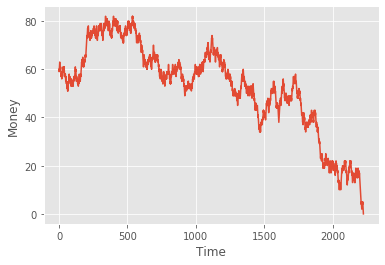

In [28]:
wlk.plotWalk()

In [29]:
wlk = GamblingWalk(60, 0.51)
wlk.P_w(1000)

array([0.919])

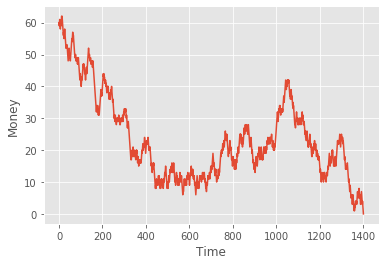

In [30]:
wlk.plotWalk()

## 1.36
Recreate tge Reed-Frost model. Observe the effect on the course of the desease by changing the initial values for the number of people suceptible and infected. How does increasing the number of infected people affect the duration of the disease?

### Answer

In [31]:
class ReedFrost():
    '''
    Class that performs the ReedFrost model. 
    The plot is not the nicest for this scenario, but might be nice to have.
    '''
    def __init__(self, initial_healthy=400, initial_infected=3, probability_inf=0.004):
        self.prob = probability_inf
        self.init_healthy = initial_healthy
        self.init_infected = initial_infected
        self.healthy = []
        self.infected = []
        
    def simulation(self, sim=1000, steps=30):
        time = []
        for i in range(sim):
            counter = 0
            sus = self.init_healthy
            inf = self.init_infected
            self.healthy = [sus]
            self.infected = [inf]
            while sus > 0 and counter<steps:
                counter+=1
                inf = np.random.binomial(sus,1-(1-self.prob)**inf)
                sus -= inf
                self.healthy.append(sus)
                self.infected.append(inf)
            time.append(len(self.healthy))
        return np.mean(time)
    
    def plot_last(self, sim=1000):
        if(len(self.infected)==0):
            self.simulation(sim)
        plt.plot(range(len(self.infected)), self.infected)
        plt.xlabel("Time")
        plt.ylabel("Infections")
        plt.show()

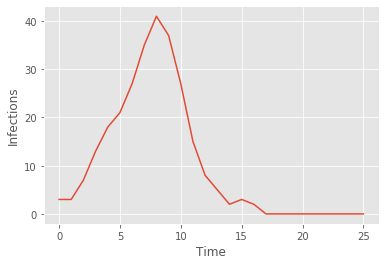

In [32]:
reed = ReedFrost()
reed.simulation(1, steps = 25)
reed.plot_last()

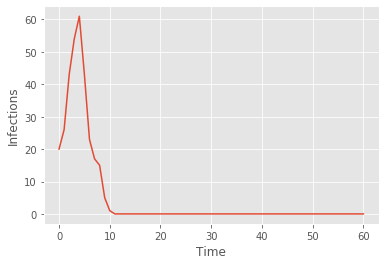

In [33]:
reed = ReedFrost(initial_infected=20)
reed.simulation(1, steps = 60)
reed.plot_last()

## 1.37
Simulate the results of exercise 1.28 Estimate the mean and variance of the number of accidents per day.

### Answer
for Doing this remember exercise 1.28 had a poisson distribution with parameter $\Lambda$, which is a random variable uniformly distributed $(0,3)$

In [34]:
class AccidentSim():
    '''
    class to perform the simulation from exercise 28, first simulate for getting lambda, then simulate
    with thar result.
    '''
    def __init__(self, min_uniform=0, max_uniform=3):
        self.min = min_uniform
        self.max = max_uniform
        self.results = []
    def simulation(self, sim=1000):
        self.results = []
        for i in range(sim):
            lam = np.random.uniform(self.min, self.max,1)
            self.results.append(np.random.poisson(lam, 1))
        return np.mean(self.results), np.var(self.results)
    def plot_last(self, sim=1000):
        if(len(self.results)==0):
            self.simulation(sim)
        plt.plot(range(len(self.results)), self.results)
        plt.show()

In [35]:
act = AccidentSim()
print(act.simulation(10000))

(1.4825, 2.17109375)
